In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [ ]:
# Read the dataset
# data = pd.read_csv('daily_dataset.csv')
data = pd.read_excel('/content/chota_bhai.xlsx')
columns = ['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max', 'energy_count', 'energy_std', 'energy_sum', 'energy_min']
# Drop unnecessary columns
data.drop(['LCLid', 'day'], axis=1, inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Scale the data to a range between 0 and 1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


Epoch 1/100
32/32 - 1s - loss: 0.0644 - 1s/epoch - 35ms/step
Epoch 2/100
32/32 - 0s - loss: 0.0451 - 57ms/epoch - 2ms/step
Epoch 3/100
32/32 - 0s - loss: 0.0321 - 60ms/epoch - 2ms/step
Epoch 4/100
32/32 - 0s - loss: 0.0229 - 61ms/epoch - 2ms/step
Epoch 5/100
32/32 - 0s - loss: 0.0160 - 61ms/epoch - 2ms/step
Epoch 6/100
32/32 - 0s - loss: 0.0121 - 62ms/epoch - 2ms/step
Epoch 7/100
32/32 - 0s - loss: 0.0102 - 55ms/epoch - 2ms/step
Epoch 8/100
32/32 - 0s - loss: 0.0092 - 61ms/epoch - 2ms/step
Epoch 9/100
32/32 - 0s - loss: 0.0085 - 60ms/epoch - 2ms/step
Epoch 10/100
32/32 - 0s - loss: 0.0080 - 95ms/epoch - 3ms/step
Epoch 11/100
32/32 - 0s - loss: 0.0075 - 91ms/epoch - 3ms/step
Epoch 12/100
32/32 - 0s - loss: 0.0072 - 95ms/epoch - 3ms/step
Epoch 13/100
32/32 - 0s - loss: 0.0070 - 104ms/epoch - 3ms/step
Epoch 14/100
32/32 - 0s - loss: 0.0068 - 101ms/epoch - 3ms/step
Epoch 15/100
32/32 - 0s - loss: 0.0066 - 93ms/epoch - 3ms/step
Epoch 16/100
32/32 - 0s - loss: 0.0065 - 81ms/epoch - 3ms/step


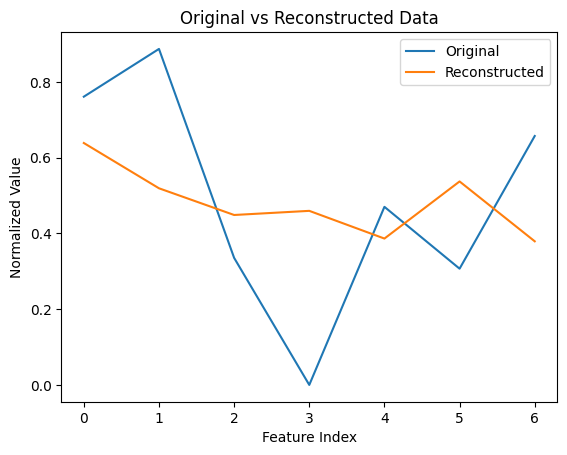

In [ ]:

# Set parameters
encoding_dim = 0.95  # Adjust to achieve desired data reduction (e.g., 0.95 for 95% reduction)
epochs = 100
batch_size = 32

# Define the ANN architecture
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=data_scaled.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(data_scaled.shape[1], activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the ANN
model.fit(data_scaled, data_scaled, epochs=epochs, batch_size=batch_size, shuffle=True, verbose=2)

# Obtain the reconstructed output
reconstructed_data = model.predict(data_scaled)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.square(data_scaled - reconstructed_data))

# Calculate data reduction percentage
data_reduction_percentage = (1 - (np.sum(model.count_params()) / data_scaled.size)) * 100

print("Reconstruction Error:", reconstruction_error)
print("Data Reduction Percentage:", data_reduction_percentage)

# Plot the original and reconstructed data
plt.plot(data_scaled[0], label='Original')
plt.plot(reconstructed_data[0], label='Reconstructed')
plt.xlabel('Feature Index')
plt.ylabel('Normalized Value')
plt.title('Original vs Reconstructed Data')
plt.legend()
plt.show()
